In [1]:
#Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Data
URL = 'https://github.com/RadhesaKilatBuwana/UTS_IOT/blob/main/Raw%20Data%20-%20Radhesa%20Kilat%20Buwana%20-%201301200182.xls?raw=true'

Raw_Accel = pd.read_excel(URL, sheet_name='Linear Acceleration') #Membaca file excel Acceerometer
Raw_Gyro = pd.read_excel(URL, sheet_name='Gyroscope') #Membaca file excel Gyroscope

Trimmed_Accel = Raw_Accel[Raw_Accel['Time (s)'] < 60] #Membatasi pembacaam dengan wakti dibawah 60 s
Trimmed_Gyro = Raw_Gyro[Raw_Gyro['Time (s)'] < 60] #Membatasi pembacaam dengan wakti dibawah 60 s

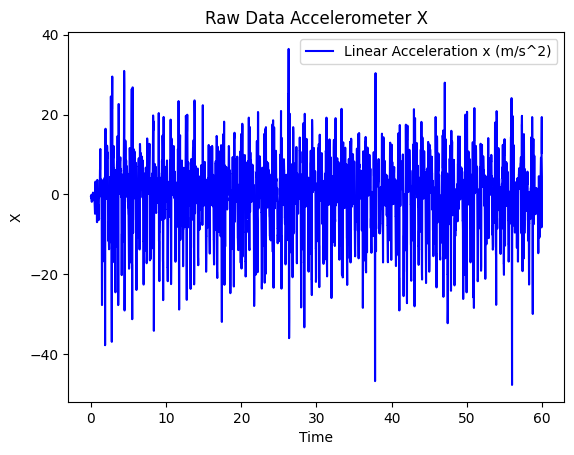

In [3]:
#Plot Accelerometer X
Plot_Accel = Trimmed_Accel.plot(x='Time (s)', y='Linear Acceleration x (m/s^2)',
                                 color='blue')

Plot_Accel.set_title("Raw Data Accelerometer X")
Plot_Accel.set_xlabel("Time")
Plot_Accel.set_ylabel("X")

plt.show()

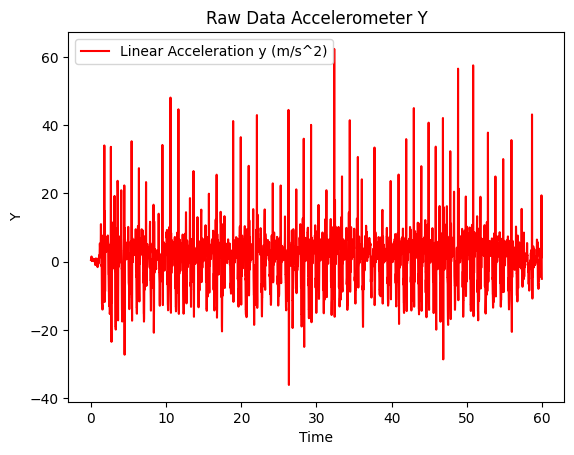

In [4]:
#Plot Accelerometer Y
Plot_Accel = Trimmed_Accel.plot(x='Time (s)', y='Linear Acceleration y (m/s^2)',
                                 color='red')

Plot_Accel.set_title("Raw Data Accelerometer Y")
Plot_Accel.set_xlabel("Time")
Plot_Accel.set_ylabel("Y")

plt.show()

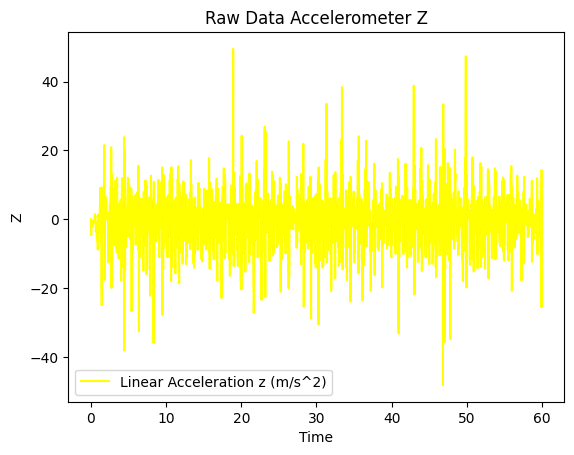

In [5]:
#Plot Accelerometer Z
Plot_Accel = Trimmed_Accel.plot(x='Time (s)', y='Linear Acceleration z (m/s^2)',
                                 color='yellow')

Plot_Accel.set_title("Raw Data Accelerometer Z")
Plot_Accel.set_xlabel("Time")
Plot_Accel.set_ylabel("Z")

plt.show()

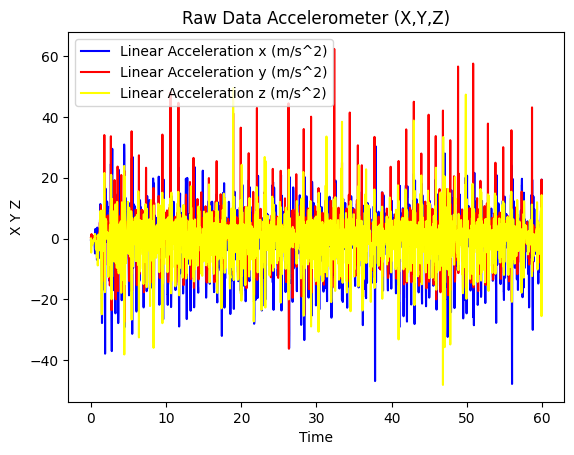

In [6]:
#Plot Accelerometer XYZ
Plot_Accel = Trimmed_Accel.plot(x='Time (s)', y=['Linear Acceleration x (m/s^2)',
                                                 'Linear Acceleration y (m/s^2)',
                                                 'Linear Acceleration z (m/s^2)'],
                                 color=['blue','red','yellow'])

Plot_Accel.set_title("Raw Data Accelerometer (X,Y,Z)")
Plot_Accel.set_xlabel("Time")
Plot_Accel.set_ylabel("X Y Z")

plt.show()

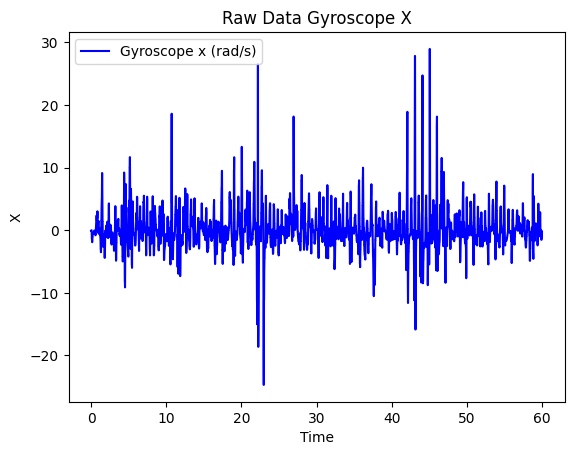

In [7]:
#Plot Gyroscope X
Plot_Gyro = Trimmed_Gyro.plot(x='Time (s)', y='Gyroscope x (rad/s)',
                               color='blue')

Plot_Gyro.set_title("Raw Data Gyroscope X")
Plot_Gyro.set_xlabel("Time")
Plot_Gyro.set_ylabel("X")

plt.show()

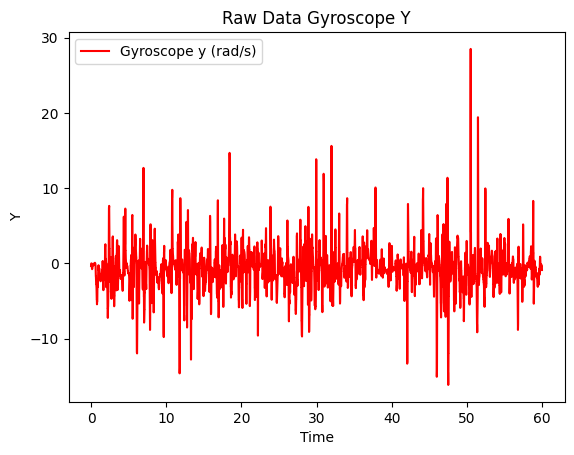

In [8]:
#Plot Gyroscope Y
Plot_Gyro = Trimmed_Gyro.plot(x='Time (s)', y='Gyroscope y (rad/s)',
                               color='red')

Plot_Gyro.set_title("Raw Data Gyroscope Y")
Plot_Gyro.set_xlabel("Time")
Plot_Gyro.set_ylabel("Y")

plt.show()

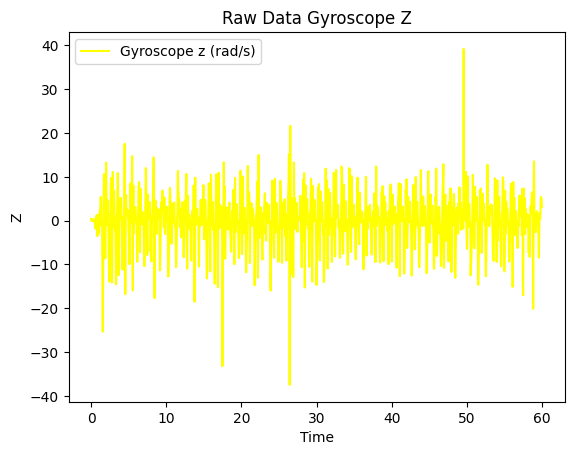

In [9]:
#Plot Gyroscope Z
Plot_Gyro = Trimmed_Gyro.plot(x='Time (s)', y='Gyroscope z (rad/s)',
                               color='yellow')

Plot_Gyro.set_title("Raw Data Gyroscope Z")
Plot_Gyro.set_xlabel("Time")
Plot_Gyro.set_ylabel("Z")

plt.show()

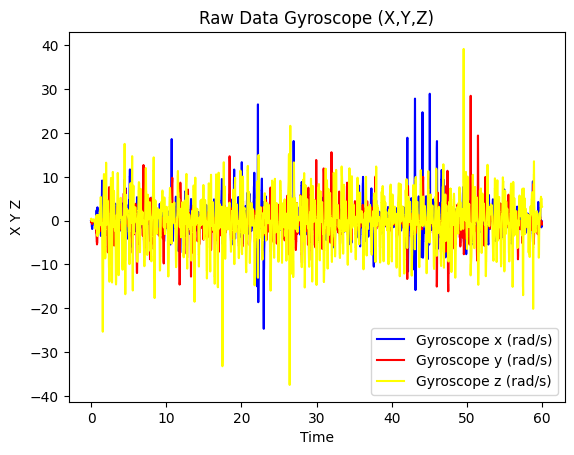

In [10]:
#Plot Gyroscope XYZ
Plot_Gyro = Trimmed_Gyro.plot(x='Time (s)', y=['Gyroscope x (rad/s)',
                                               'Gyroscope y (rad/s)',
                                               'Gyroscope z (rad/s)'],
                               color=['blue','red','yellow'])

Plot_Gyro.set_title("Raw Data Gyroscope (X,Y,Z)")
Plot_Gyro.set_xlabel("Time")
Plot_Gyro.set_ylabel("X Y Z")

plt.show()

<ipython-input-11-a958dbb90e16>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trimmed_Accel['rho'] = np.arctan(Trimmed_Accel['Linear Acceleration z (m/s^2)']/
<ipython-input-11-a958dbb90e16>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trimmed_Accel['rho'] = np.degrees(Trimmed_Accel['rho'])


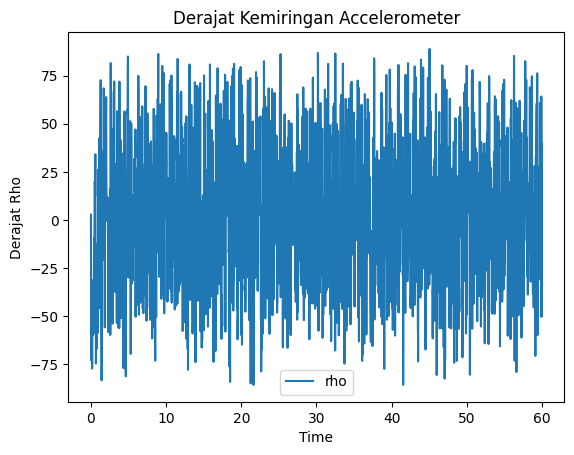

In [11]:
#Derajat Kemeiringan Accelerometer

Trimmed_Accel['rho'] = np.arctan(Trimmed_Accel['Linear Acceleration z (m/s^2)']/
                                 np.sqrt(Trimmed_Accel['Linear Acceleration y (m/s^2)']**2
                                         +Trimmed_Accel['Linear Acceleration x (m/s^2)']**2))
Trimmed_Accel['rho'] = np.degrees(Trimmed_Accel['rho'])

Plot_Angle = Trimmed_Accel.plot(x='Time (s)', y='rho')

Plot_Angle.set_title("Derajat Kemiringan Accelerometer")
Plot_Angle.set_xlabel("Time")
Plot_Angle.set_ylabel("Derajat Rho")

plt.show()

<ipython-input-16-6fe02f20a639>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trimmed_Gyro['Filtered'] = (alpha * Trimmed_Gyro['Gyroscope z (rad/s)']* dt +


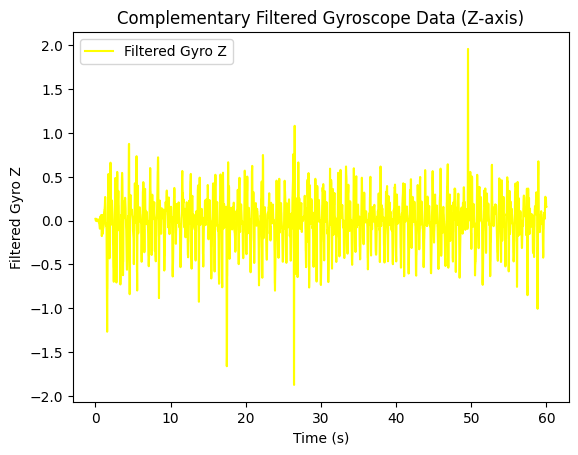

In [16]:
#Gyro Z Complementary Filter

alpha = 0.98 # Faktor Gyroscope
dt = 0.05 # Sampling Time
Trimmed_Gyro['Filtered'] = (alpha * Trimmed_Gyro['Gyroscope z (rad/s)']* dt +
                            (1 - alpha) * Trimmed_Gyro['Filtered'].shift(1))

# Create a plot of the filtered result
fig, ax = plt.subplots()
ax.plot(Trimmed_Gyro['Time (s)'], Trimmed_Gyro['Filtered'], color='Yellow', label='Filtered Gyro Z')
ax.set_title('Complementary Filtered Gyroscope Data (Z-axis)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Filtered Gyro Z')
ax.legend()
plt.show()

<ipython-input-17-684a2b4e0b3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trimmed_Accel['Filtered'] = ((Trimmed_Gyro['Filtered']*0.8) +


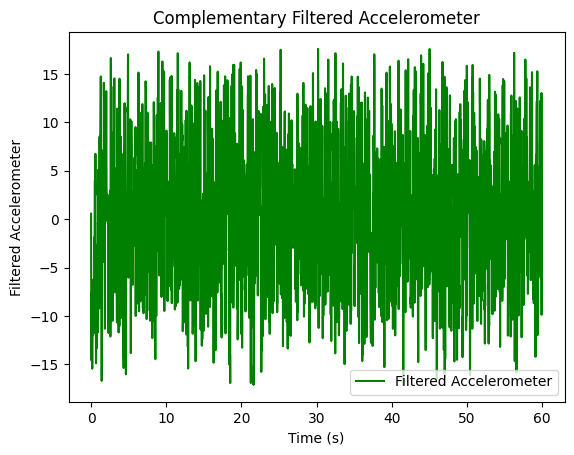

In [17]:
#Accelerometer Complementary Filter
Trimmed_Accel['Filtered'] = ((Trimmed_Gyro['Filtered']*0.8) + 
                             (Trimmed_Accel['rho']*0.2))
fig, ax = plt.subplots()
ax.plot(Trimmed_Accel['Time (s)'], Trimmed_Accel['Filtered'], color='Green', label='Filtered Accelerometer')
ax.set_title('Complementary Filtered Accelerometer')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Filtered Accelerometer')
ax.legend()
plt.show()